In [15]:
import torch
import matplotlib.pyplot as plt
A=8
W=4
qat_acc = []
qavat_acc = []
noise_list = (0.1,0.2,0.3,0.4,0.5)
for noise in noise_list:
    basemodel = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise0.0.ckpt'%(noise,A,W)
    VAmodel = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise%s.ckpt'%(noise,A,W,noise)
    basemodel_res = torch.load(basemodel)
    VAmodel_res = torch.load(VAmodel)
    print("noise %s"%noise)
    print("QAT %.4f"%(basemodel_res['mean_acc']))
    print("QAT+VAT %.4f"%(VAmodel_res['mean_acc']))
    print("")
    qat_acc.append(basemodel_res['mean_acc'])
    qavat_acc.append(VAmodel_res['mean_acc'])

noise 0.1
QAT 0.8993
QAT+VAT 0.9043

noise 0.2
QAT 0.8754
QAT+VAT 0.8905

noise 0.3
QAT 0.8227
QAT+VAT 0.8802

noise 0.4
QAT 0.7476
QAT+VAT 0.8652

noise 0.5
QAT 0.6459
QAT+VAT 0.8454



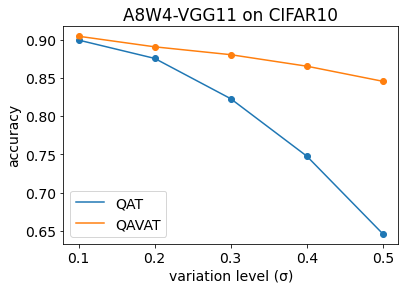

In [16]:
plt.rcParams.update({'font.size': 14})
plt.plot(noise_list,qat_acc,label='QAT')
plt.scatter(noise_list,qat_acc)
plt.plot(noise_list,qavat_acc,label='QAVAT')
plt.scatter(noise_list,qavat_acc)
plt.title('A%sW%s-VGG11 on CIFAR10'%(A,W))
plt.xlabel('variation level (\u03C3)')
plt.ylabel('accuracy')
plt.legend(loc='lower left')
plt.savefig('A%sW%s-VGG11.pdf'%(A,W))
plt.show()

noise 0.1
A8W1 0.8803

noise 0.1
A8W2 0.8891

noise 0.1
A8W3 0.9008

noise 0.1
A8W4 0.8993

noise 0.2
A8W1 0.8709

noise 0.2
A8W2 0.8771

noise 0.2
A8W3 0.8849

noise 0.2
A8W4 0.8754

noise 0.3
A8W1 0.8522

noise 0.3
A8W2 0.8516

noise 0.3
A8W3 0.8479

noise 0.3
A8W4 0.8227

noise 0.4
A8W1 0.8217

noise 0.4
A8W2 0.8073

noise 0.4
A8W3 0.7866

noise 0.4
A8W4 0.7476

noise 0.5
A8W1 0.7729

noise 0.5
A8W2 0.7380

noise 0.5
A8W3 0.7062

noise 0.5
A8W4 0.6459



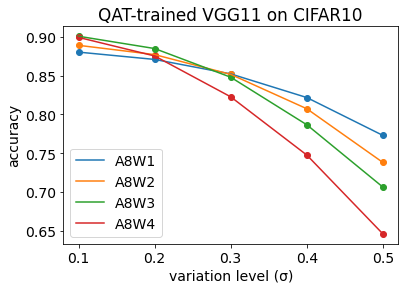

In [17]:
A_list=[8]
W_list=[1,2,3,4]
A_Ws = [(a,w) for a in A_list for w in W_list]
acc_listOflist=[[] for _ in A_Ws]
noise_list = (0.1,0.2,0.3,0.4,0.5)
for noise in noise_list:
    for i in range(len(A_Ws)):
        A,W = A_Ws[i]
        model = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise%s.ckpt'%(noise,A,W,noise)
        model = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise0.0.ckpt'%(noise,A,W)
        model_res = torch.load(model)
        print("noise %s"%noise)
        print("A%sW%s %.4f"%(A,W,model_res['mean_acc']))
        print("")
        acc_listOflist[i].append(model_res['mean_acc'])
plt.rcParams.update({'font.size': 14})        
for i in range(len(A_Ws)):
    A,W = A_Ws[i]
    plt.plot(noise_list,acc_listOflist[i],label='A%sW%s'%(A,W))
    plt.scatter(noise_list,acc_listOflist[i])

plt.title('QAT-trained VGG11 on CIFAR10')
plt.xlabel('variation level (\u03C3)')
plt.ylabel('accuracy')
plt.legend(loc='lower left')
plt.savefig('QAT_robust_trend.pdf')
plt.show()

    

noise 0.1
A8W1 0.8796

noise 0.1
A8W2 0.8939

noise 0.1
A8W3 0.8994

noise 0.1
A8W4 0.9043

noise 0.1
A5W1 0.8716

noise 0.1
A5W2 0.8719

noise 0.1
A5W3 0.8866

noise 0.1
A5W4 0.8893

noise 0.2
A8W1 0.8704

noise 0.2
A8W2 0.8808

noise 0.2
A8W3 0.8908

noise 0.2
A8W4 0.8905

noise 0.2
A5W1 0.8634

noise 0.2
A5W2 0.8736

noise 0.2
A5W3 0.8784

noise 0.2
A5W4 0.8774

noise 0.3
A8W1 0.8569

noise 0.3
A8W2 0.8691

noise 0.3
A8W3 0.8758

noise 0.3
A8W4 0.8802

noise 0.3
A5W1 0.8500

noise 0.3
A5W2 0.8577

noise 0.3
A5W3 0.8670

noise 0.3
A5W4 0.8695

noise 0.4
A8W1 0.8371

noise 0.4
A8W2 0.8549

noise 0.4
A8W3 0.8596

noise 0.4
A8W4 0.8652

noise 0.4
A5W1 0.8333

noise 0.4
A5W2 0.8375

noise 0.4
A5W3 0.8578

noise 0.4
A5W4 0.8554

noise 0.5
A8W1 0.8184

noise 0.5
A8W2 0.8338

noise 0.5
A8W3 0.8410

noise 0.5
A8W4 0.8454

noise 0.5
A5W1 0.8152

noise 0.5
A5W2 0.8008

noise 0.5
A5W3 0.8365

noise 0.5
A5W4 0.8390



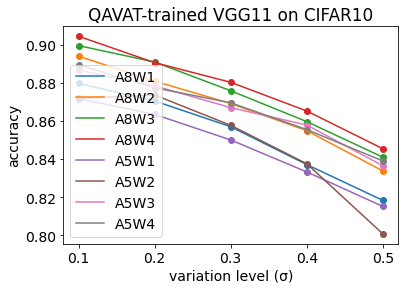

In [19]:
A_list=[8,5]
W_list=[1,2,3,4]
A_Ws = [(a,w) for a in A_list for w in W_list]
acc_listOflist=[[] for _ in A_Ws]
noise_list = (0.1,0.2,0.3,0.4,0.5)
for noise in noise_list:
    for i in range(len(A_Ws)):
        A,W = A_Ws[i]
        model = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise%s.ckpt'%(noise,A,W,noise)
        #model = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise0.0.ckpt'%(noise,A,W)
        model_res = torch.load(model)
        print("noise %s"%noise)
        print("A%sW%s %.4f"%(A,W,model_res['mean_acc']))
        print("")
        acc_listOflist[i].append(model_res['mean_acc'])
plt.rcParams.update({'font.size': 14})        
for i in range(len(A_Ws)):
    A,W = A_Ws[i]
    plt.plot(noise_list,acc_listOflist[i],label='A%sW%s'%(A,W))
    plt.scatter(noise_list,acc_listOflist[i])

plt.title('QAVAT-trained VGG11 on CIFAR10')
plt.xlabel('variation level (\u03C3)')
plt.ylabel('accuracy')
plt.legend(loc='lower left')
plt.savefig('QAVAT_robust_trend.pdf')
plt.show()